In [1]:
import numpy as npy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

readTmp = npy.genfromtxt("mlm.csv",delimiter=",",skip_header=1)
x = readTmp[:,0:2].copy()
y = readTmp[:,2].copy()

mn = x.min(axis=0)
mx = x.max(axis=0)
x[:,0]=(x[:,0]-mn[0])/(mx[0]-mn[0])
x[:,1]=(x[:,1]-mn[1])/(mx[1]-mn[1])

w = npy.array([1,1])
b = npy.array(y[0]-x[0].dot(w))
eta = 0.0001
epoch = 30000

for tep in range(epoch):
    for i in range(0,len(x),5):
        dw = 0
        db = 0
        for j in range(0,5):
            z = x[i+j].dot(w) + b
            db += z - y[i+j]
            dw += (z - y[i+j]) * x[i+j]
        b = b - (eta * db) / 5
        w = w - (eta * dw) / 5
    loss = 0
    for i in range(len(x)):
        z = x[i].dot(w) + b
        loss += abs(0.5 * (z - y[i]) * (z - y[i]))
    loss /= len(x)
    if (tep+1) % 5000 == 0:
        print("epoch #%d:" % (tep+1), "w =", w / (mx-mn), "b =", b - ((w*mn)/(mx-mn)).sum(), "loss =", loss)

b = b - ((w*mn)/(mx-mn)).sum()
w = w / (mx-mn)
print("z =", w[0], "x +", w[1], "y +", b)

epoch #5000: w = [ 4.01635686 -3.77455906] b = 4.7577312863604915 loss = 1.5947376598298157
epoch #10000: w = [ 4.02126263 -3.7709158 ] b = 4.312702804287273 loss = 1.579301270364327
epoch #15000: w = [ 4.0212838  -3.77089507] b = 4.31052065227905 loss = 1.579300912159784
epoch #20000: w = [ 4.0212839  -3.77089497] b = 4.3105099630789745 loss = 1.5793009121727173
epoch #25000: w = [ 4.0212839  -3.77089497] b = 4.310509910740615 loss = 1.5793009121728214
epoch #30000: w = [ 4.0212839  -3.77089497] b = 4.310509910519965 loss = 1.579300912172828
z = 4.0212838992805615 x + -3.770894967642779 y + 4.310509910519965


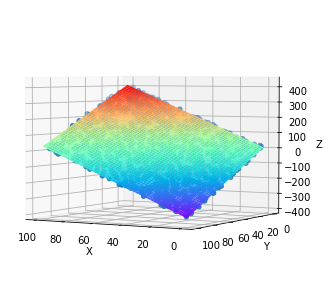

In [2]:
z = readTmp[:,2]
y = readTmp[:,1]
x = readTmp[:,0]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x,y,z)
p = npy.linspace(0,100)
q = npy.linspace(0,100)
P,Q = npy.meshgrid(p,q)
R = npy.hstack((P.ravel().reshape(2500,1), Q.ravel().reshape(2500,1)))
Z = R.dot(w) + b
Z = Z.reshape(50, 50)
ax.plot_surface(P,Q,Z, cmap='rainbow')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# ax.view_init(20, 270) # 1.png
ax.view_init(3, 120) # 2.png
plt.show()